In [500]:
"""
    Feature engineering in training data and building up the model
"""

'\n    Feature engineering in training data and building up the model\n'

In [98]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [99]:
# Finding the csv from the league
# Multi League directory
country = 'MX'
dirCountry = '../' + country + '/'
# csv to save
file_title = 'ligaMX_9.csv'
csv_file = dirCountry + file_title
df_one = pd.read_csv(csv_file)
file_title = 'ligamx_2019.csv'
csv_file = dirCountry + file_title
df_two = pd.read_csv(csv_file)
df_one = df_one.drop(columns=["league","id"], axis=1)
df_two["season"] = np.full(df_two.shape[0], 2019)
df_two["week"] = np.full(df_two.shape[0], 28)
df_one["week"] = df_one["week"].apply(lambda x: int(''.join(filter(str.isdigit, x))))

In [100]:
# Testing against current season
current_season = 2020

In [101]:
# Retrieving previous saved data
df_laliga = df_one.append(df_two)
df_laliga = df_laliga.drop(df_laliga.columns[0], axis=1)
df_laliga = df_laliga.drop(columns=["stats_home","stats_away"], axis=1)

In [102]:
# None values set to 0
df_laliga.fillna(value=0, inplace=True)

In [103]:
# g_diff_home: an integer of the goals difference for home
df_laliga["g_diff_home"] = df_laliga["goals_home"] - df_laliga["goals_away"]
df_laliga.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.corners,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,g_diff_home
0,2020,4,1.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,1.0,2.0,63%,2.0,0.0,3.0,465.0,389.0,84%,1.0
1,2020,14,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,2020,8,0.0,2.0,2288,Necaxa,15,8,-7,LLWDW,...,3.0,1.0,69%,0.0,0.0,5.0,583.0,525.0,90%,-2.0
3,2020,16,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,2020,3,1.0,1.0,2288,Necaxa,18,1,-4,DLL,...,7.0,0.0,43%,2.0,0.0,2.0,264.0,197.0,75%,0.0


In [104]:
# g_diff_away: an integer of the goals difference for away
df_laliga["g_diff_away"] = df_laliga["goals_away"] - df_laliga["goals_home"]
df_laliga.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away
0,2020,4,1.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,2.0,63%,2.0,0.0,3.0,465.0,389.0,84%,1.0,-1.0
1,2020,14,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,2020,8,0.0,2.0,2288,Necaxa,15,8,-7,LLWDW,...,1.0,69%,0.0,0.0,5.0,583.0,525.0,90%,-2.0,2.0
3,2020,16,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,2020,3,1.0,1.0,2288,Necaxa,18,1,-4,DLL,...,0.0,43%,2.0,0.0,2.0,264.0,197.0,75%,0.0,0.0


In [105]:
# Set win as 1, draw as 0 and lose as -1
def get_status(r):
    goals_home = r["goals_fhome"] + r["goals_shome"]
    goals_away = r["goals_faway"] + r["goals_saway"]
    if goals_home > goals_away:
        return 1
    elif goals_home == goals_away:
        return 0
    else:
        return -1

In [106]:
def get_status(r):
    goals_home = r["goals_home"]
    goals_away = r["goals_away"]
    if goals_home > goals_away:
        return 1
    elif goals_home == goals_away:
        return 0
    else:
        return -1

In [107]:
"""
    Form: last 5 losses
        last 5 wins
        last 5 draws
"""
# Home
df_laliga["wins_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('W'))
df_laliga["loses_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('L'))
df_laliga["draws_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('D'))
# Away
df_laliga["wins_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('W'))
df_laliga["loses_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('L'))
df_laliga["draws_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('D'))

df_laliga.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2020,4,1.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,389.0,84%,1.0,-1.0,1,2,1,1,2,2
1,2020,14,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0,0.0,0.0,1,3,1,2,3,0
2,2020,8,0.0,2.0,2288,Necaxa,15,8,-7,LLWDW,...,525.0,90%,-2.0,2.0,2,2,1,3,0,2
3,2020,16,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0,0.0,0.0,1,3,1,2,3,0
4,2020,3,1.0,1.0,2288,Necaxa,18,1,-4,DLL,...,197.0,75%,0.0,0.0,0,2,1,3,2,0


In [108]:
# Promotion: either Champions, UEFA Europe, Second division
# Label encoder vs Normalize unicode encoder
description = np.unique(df_laliga["team_home.description"].astype(str))
description = np.append(description, np.unique(df_laliga["team_away.description"].astype(str)))
enc = preprocessing.LabelEncoder()
enc.fit(description)
df_laliga["team_home.description"] = enc.transform(df_laliga["team_home.description"].astype(str))
df_laliga["team_away.description"] = enc.transform(df_laliga["team_away.description"].astype(str))
df_laliga.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2020,4,1.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,389.0,84%,1.0,-1.0,1,2,1,1,2,2
1,2020,14,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0,0.0,0.0,1,3,1,2,3,0
2,2020,8,0.0,2.0,2288,Necaxa,15,8,-7,LLWDW,...,525.0,90%,-2.0,2.0,2,2,1,3,0,2
3,2020,16,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0,0.0,0.0,1,3,1,2,3,0
4,2020,3,1.0,1.0,2288,Necaxa,18,1,-4,DLL,...,197.0,75%,0.0,0.0,0,2,1,3,2,0


In [109]:
# Group: conference west vs east
description = np.unique(df_laliga["team_home.group"].astype(str))
enc = preprocessing.LabelEncoder()
enc.fit(description)
df_laliga["team_home.group"] = enc.transform(df_laliga["team_home.group"].astype(str))
df_laliga["team_away.group"] = enc.transform(df_laliga["team_away.group"].astype(str))
df_laliga.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2020,4,1.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,389.0,84%,1.0,-1.0,1,2,1,1,2,2
1,2020,14,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0,0.0,0.0,1,3,1,2,3,0
2,2020,8,0.0,2.0,2288,Necaxa,15,8,-7,LLWDW,...,525.0,90%,-2.0,2.0,2,2,1,3,0,2
3,2020,16,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0,0.0,0.0,1,3,1,2,3,0
4,2020,3,1.0,1.0,2288,Necaxa,18,1,-4,DLL,...,197.0,75%,0.0,0.0,0,2,1,3,2,0


In [110]:
def score_home(best):
    if best != 0:
        return int(best[0]) - int(best[2])
    return best

In [111]:
def score_away(best):
    if best != 0:
        return int(best[2]) - int(best[0])
    return best

In [112]:
# For best_lose
df_laliga["team_away.stats_home.streaks.best_lose"] = df_laliga["team_away.stats_home.streaks.best_lose"].apply(score_home)
df_laliga["team_away.stats_away.streaks.best_lose"] = df_laliga["team_away.stats_away.streaks.best_lose"].apply(score_away)
# For best_win
df_laliga["team_away.stats_home.streaks.best_win"] = df_laliga["team_away.stats_home.streaks.best_win"].apply(score_home)
df_laliga["team_away.stats_away.streaks.best_win"] = df_laliga["team_away.stats_away.streaks.best_win"].apply(score_away)
df_laliga.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2020,4,1.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,389.0,84%,1.0,-1.0,1,2,1,1,2,2
1,2020,14,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0,0.0,0.0,1,3,1,2,3,0
2,2020,8,0.0,2.0,2288,Necaxa,15,8,-7,LLWDW,...,525.0,90%,-2.0,2.0,2,2,1,3,0,2
3,2020,16,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0,0.0,0.0,1,3,1,2,3,0
4,2020,3,1.0,1.0,2288,Necaxa,18,1,-4,DLL,...,197.0,75%,0.0,0.0,0,2,1,3,2,0


In [113]:
# For best_lose
df_laliga["team_home.stats_home.streaks.best_lose"] = df_laliga["team_home.stats_home.streaks.best_lose"].apply(score_home)
df_laliga["team_home.stats_away.streaks.best_lose"] = df_laliga["team_home.stats_away.streaks.best_lose"].apply(score_away)
# For best_win
df_laliga["team_home.stats_home.streaks.best_win"] = df_laliga["team_home.stats_home.streaks.best_win"].apply(score_home)
df_laliga["team_home.stats_away.streaks.best_win"] = df_laliga["team_home.stats_away.streaks.best_win"].apply(score_away)
df_laliga.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2020,4,1.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,389.0,84%,1.0,-1.0,1,2,1,1,2,2
1,2020,14,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0,0.0,0.0,1,3,1,2,3,0
2,2020,8,0.0,2.0,2288,Necaxa,15,8,-7,LLWDW,...,525.0,90%,-2.0,2.0,2,2,1,3,0,2
3,2020,16,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0,0.0,0.0,1,3,1,2,3,0
4,2020,3,1.0,1.0,2288,Necaxa,18,1,-4,DLL,...,197.0,75%,0.0,0.0,0,2,1,3,2,0


In [114]:
# Posession % to decimal as p_percentage
df_laliga["stats_away.p_percentage"] = df_laliga["stats_away.p_percentage"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_home.p_percentage"] = df_laliga["stats_home.p_percentage"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_away.possession"] = df_laliga["stats_away.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_home.possession"] = df_laliga["stats_home.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2020,4,1.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,389.0,0.84,1.0,-1.0,1,2,1,1,2,2
1,2020,14,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0.00,0.0,0.0,1,3,1,2,3,0
2,2020,8,0.0,2.0,2288,Necaxa,15,8,-7,LLWDW,...,525.0,0.90,-2.0,2.0,2,2,1,3,0,2
3,2020,16,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0.00,0.0,0.0,1,3,1,2,3,0
4,2020,3,1.0,1.0,2288,Necaxa,18,1,-4,DLL,...,197.0,0.75,0.0,0.0,0,2,1,3,2,0


In [115]:
"""
    Following this premise:
    - Away standings from home team aren't relevant
    - Home standings from away team aren't relevant
"""
# Drop away standings
df_premise = df_laliga.drop(df_laliga.filter(regex='team_away.stats_home.').columns, axis=1)
df_premise = df_laliga.drop(df_laliga.filter(regex='team_home.stats_away.').columns, axis=1)
print(df_premise.shape)
df_premise.head()

(410, 111)


,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2020,4,1.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,389.0,0.84,1.0,-1.0,1,2,1,1,2,2
1,2020,14,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0.00,0.0,0.0,1,3,1,2,3,0
2,2020,8,0.0,2.0,2288,Necaxa,15,8,-7,LLWDW,...,525.0,0.90,-2.0,2.0,2,2,1,3,0,2
3,2020,16,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0.00,0.0,0.0,1,3,1,2,3,0
4,2020,3,1.0,1.0,2288,Necaxa,18,1,-4,DLL,...,197.0,0.75,0.0,0.0,0,2,1,3,2,0


In [116]:
"""
    Here the unseen data will be built as test set - Liga Mx
"""
p37 = [[2288, 2278], [2298, 2291], [2283, 14002], [2279, 2285], [2287, 2281], [2286, 2314], 
       [2290, 2289], [2280, 2295], [2292, 2282]]

In [117]:
# Getting previous record
ts_laliga = pd.DataFrame()
ts_premise = pd.DataFrame()
for match in p37:
    ts_laliga = ts_laliga.append(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])])
    ts_premise = ts_premise.append(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])])
ts_premise.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
6,2020,10,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0.0,0.0,0.0,1,3,1,2,1,2
141,2020,10,0.0,0.0,2298,FC Juarez,12,10,-2,WDLDL,...,0.0,0.0,0.0,0.0,1,2,2,1,4,0
118,2020,10,0.0,0.0,2283,Atlas,15,9,-3,DWLWD,...,0.0,0.0,0.0,0.0,2,1,2,1,2,2
123,2020,10,0.0,0.0,2279,Tigres UANL,10,11,1,DLDDL,...,0.0,0.0,0.0,0.0,0,2,3,1,2,2
210,2019,28,4.0,0.0,2279,Tigres UANL,7,14,3,WDWLL,...,301.0,0.8,4.0,-4.0,2,2,1,4,1,0


In [118]:
# Getting previous record
weeks = [10]
ts_laliga = pd.DataFrame()
ts_premise = pd.DataFrame()
for match in p37:
    ts_laliga = ts_laliga.append(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1]) & (df_laliga["week"].isin(weeks))])
    ts_premise = ts_premise.append(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1]) & (df_premise["week"].isin(weeks))])
ts_premise.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
6,2020,10,0.0,0.0,2288,Necaxa,18,8,-8,LLLWD,...,0.0,0.0,0.0,0.0,1,3,1,2,1,2
141,2020,10,0.0,0.0,2298,FC Juarez,12,10,-2,WDLDL,...,0.0,0.0,0.0,0.0,1,2,2,1,4,0
118,2020,10,0.0,0.0,2283,Atlas,15,9,-3,DWLWD,...,0.0,0.0,0.0,0.0,2,1,2,1,2,2
123,2020,10,0.0,0.0,2279,Tigres UANL,10,11,1,DLDDL,...,0.0,0.0,0.0,0.0,0,2,3,1,2,2
37,2020,10,0.0,0.0,2287,Club America,3,19,6,WWWLL,...,0.0,0.0,0.0,0.0,3,2,0,2,3,0


In [119]:
print(ts_laliga.shape)
print(ts_premise.shape)

(9, 128)
(9, 111)


In [120]:
# Remove categorical values as team_away and team_home names, team_home.form
df_laliga = df_laliga.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])
df_laliga.head()
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])

(410, 124)


In [121]:
# Auxiliar for team names
ts_name = pd.DataFrame()
ts_name["team_home.team.name"] = ts_laliga["team_home.team.name"]
ts_name["team_away.team.name"] = ts_laliga["team_away.team.name"]
ts_laliga = ts_laliga.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])
ts_premise = ts_premise.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])

In [122]:
# This is done before training, after building testing
#for match in p37:
    #df_laliga = df_laliga.drop(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])].index)
    #df_premise = df_premise.drop(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])].index)
for match in p37:
    df_laliga = df_laliga.drop(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])].index)
    df_premise = df_premise.drop(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])].index)
print(df_laliga.shape)
print(df_premise.shape)

(384, 124)
(384, 107)


In [123]:
# status_home: either win, draw or lose for home team, predicted label
label = []
for index, row in df_laliga.iterrows():
    label.append(get_status(row))
print(label)

[1, 0, -1, 0, 0, 1, -1, 0, 0, 1, 1, 0, 0, 0, 0, -1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, -1, 1, 1, 1, 0, -1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, -1, 0, 0, 1, -1, 0, 0, 0, 1, 1, 0, 0, -1, -1, 0, 0, 1, 0, 1, 1, 1, 1, 1, -1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, 1, 0, 1, 0, 1, 0, -1, 0, 0, -1, 1, 0, 0, 1, 0, 0, -1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, -1, 0, -1, 0, 1, 0, 0, 1, -1, 1, 1, 0, 0, -1, -1, 1, 0, 0, 1, 1, 1, -1, 1, 0, 1, -1, -1, -1, -1, -1, 0, 1, 1, -1, 0, -1, 1, -1, 0, 0, 0, 1, -1, 0, 0, 0, 1, -1, 1, -1, 1, -1, 1, 1, 1, 0, -1, 0, 1, 1, -1, 1, 1, -1, 1, -1, -1, 0, 0, 0, 1, 0, 1, 1, -1, 1, 1, 1, 1, 0, 1, 1, 0, -1, -1, 1, -1, 0, -1, 1, -1, -1, -1, 1, 0, -1, 1, 1, 0, -1, 0, -1, 1, 1, 1, 1, 1, -1, -1, 0, -1, -1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 0, 0, 0, 0, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, -1, -1, 1, 0, -1, -1, 1, 1, 1,

In [124]:
# Here the clean dataset to study in tableau
df_tableau = df_laliga.copy()
df_tableau["result"] = label
# csv to save
file_title = 'clean_ligamx_p7.csv'
results_file = '../' + 'Tableau' + '/' + file_title
df_tableau.to_csv(results_file)

In [125]:
# Missing linear regression for goals_home and goals_away, as goal_diff
df_laliga = df_laliga.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
ts_laliga = ts_laliga.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
ts_premise = ts_premise.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])

(384, 120)


In [126]:
# La liga
# GET avg for team_home.stats_home. team_home.stats_away. team_away.stats_home. team_away.stats_away.
columns_home = df_laliga.filter(regex='^stats_home').columns
#columns_g_home = df_laliga.filter(["goals_home","g_diff_home"]).columns
#columns_home = columns_home.append(columns_g_home)
#avg_home_laliga = df_laliga.groupby(['team_home.team.id'], as_index=True)[columns_home].mean()
avg_home_laliga = df_laliga.groupby(['team_home.team.id','season'], as_index=True)[columns_home].mean()
avg_home_laliga.head()

stats_home.s_on_g  stats_home.s_off_g  \
team_home.team.id season                                          
2278              2019             5.090909            5.363636   
                  2020             1.777778            3.111111   
2279              2019             4.571429            6.357143   
                  2020             1.875000            2.500000   
2280              2019             4.538462            6.000000   

                          stats_home.s_in  stats_home.s_out  \
team_home.team.id season                                      
2278              2019          14.272727          3.818182   
                  2020           6.555556          1.666667   
2279              2019          14.642857          3.714286   
                  2020           5.625000          1.250000   
2280              2019          13.692308          3.153846   

                          stats_home.s_total  stats_home.s_blocked  \
team_home.team.id season                                             
2278              2019              7.363636              6.909091   
                  2020              3.555556              3.000000   
2279              2019              8.285714              6.357143   
                  2020              4.000000              1.625000   
2280              2019              7.461538              6.230769   

                          stats_home.fouls  stats_home.corners  \
team_home.team.id season                                         
2278              2019           12.818182            5.818182   
                  2020            5.333333            1.777778   
2279              2019           13.214286            5.714286   
                  2020            6.750000            2.500000   
2280              2019           15.769231            4.538462   

                          stats_home.offside  stats_home.possession  \
team_home.team.id season                                              
2278              2019              0.636364               0.551818   
                  2020              0.555556               0.290000   
2279              2019              1.714286               0.618571   
                  2020              1.000000               0.293750   
2280              2019              2.769231               0.479231   

                          stats_home.c_yellow  stats_home.c_red  \
team_home.team.id season                                          
2278              2019               2.000000          0.181818   
                  2020               0.777778          0.111111   
2279              2019               1.142857          0.000000   
                  2020               1.250000          0.250000   
2280              2019               2.538462          0.615385   

                          stats_home.saves  stats_home.p_total  \
team_home.team.id season                                         
2278              2019            2.272727          426.545455   
                  2020            1.111111          226.777778   
2279              2019            2.357143          508.214286   
                  2020            1.500000          239.125000   
2280              2019            2.000000          352.000000   

                          stats_home.p_accurate  stats_home.p_percentage  
team_home.team.id season                                                  
2278              2019               359.363636                 0.834545  
                  2020               188.333333                 0.461111  
2279              2019               440.571429                 0.860714  
                  2020               206.875000                 0.430000  
2280              2019               272.615385                 0.766154

In [127]:
try:
    p = avg_home_laliga.index.values
    b = list(zip(*p))
    avg_home_laliga.insert(0, column="home_team_id",value = b[0])
    avg_home_laliga.head()
except:
    print("The indexes that are trying to be registered are already created.")

In [128]:
avg_home_laliga.head()

home_team_id  stats_home.s_on_g  stats_home.s_off_g  \
team_home.team.id season                                                        
2278              2019            2278           5.090909            5.363636   
                  2020            2278           1.777778            3.111111   
2279              2019            2279           4.571429            6.357143   
                  2020            2279           1.875000            2.500000   
2280              2019            2280           4.538462            6.000000   

                          stats_home.s_in  stats_home.s_out  \
team_home.team.id season                                      
2278              2019          14.272727          3.818182   
                  2020           6.555556          1.666667   
2279              2019          14.642857          3.714286   
                  2020           5.625000          1.250000   
2280              2019          13.692308          3.153846   

                          stats_home.s_total  stats_home.s_blocked  \
team_home.team.id season                                             
2278              2019              7.363636              6.909091   
                  2020              3.555556              3.000000   
2279              2019              8.285714              6.357143   
                  2020              4.000000              1.625000   
2280              2019              7.461538              6.230769   

                          stats_home.fouls  stats_home.corners  \
team_home.team.id season                                         
2278              2019           12.818182            5.818182   
                  2020            5.333333            1.777778   
2279              2019           13.214286            5.714286   
                  2020            6.750000            2.500000   
2280              2019           15.769231            4.538462   

                          stats_home.offside  stats_home.possession  \
team_home.team.id season                                              
2278              2019              0.636364               0.551818   
                  2020              0.555556               0.290000   
2279              2019              1.714286               0.618571   
                  2020              1.000000               0.293750   
2280              2019              2.769231               0.479231   

                          stats_home.c_yellow  stats_home.c_red  \
team_home.team.id season                                          
2278              2019               2.000000          0.181818   
                  2020               0.777778          0.111111   
2279              2019               1.142857          0.000000   
                  2020               1.250000          0.250000   
2280              2019               2.538462          0.615385   

                          stats_home.saves  stats_home.p_total  \
team_home.team.id season                                         
2278              2019            2.272727          426.545455   
                  2020            1.111111          226.777778   
2279              2019            2.357143          508.214286   
                  2020            1.500000          239.125000   
2280              2019            2.000000          352.000000   

                          stats_home.p_accurate  stats_home.p_percentage  
team_home.team.id season                                                  
2278              2019               359.363636                 0.834545  
                  2020               188.333333                 0.461111  
2279              2019               440.571429                 0.860714  
                  2020               206.875000                 0.430000  
2280              2019               272.615385                 0.766154

In [129]:
columns_away = df_laliga.filter(regex='^stats_away').columns
#columns_g_away = df_laliga.filter(["goals_away","g_diff_away"]).columns
#columns_away = columns_home.append(columns_g_away)
#avg_away_laliga = df_laliga.groupby(['team_away.team.id'], as_index=True)[columns_away].mean()
avg_away_laliga = df_laliga.groupby(['team_away.team.id','season'], as_index=True)[columns_away].mean()
avg_away_laliga.head(10)

stats_away.s_on_g  stats_away.s_off_g  \
team_away.team.id season                                          
2278              2019             3.928571            4.642857   
                  2020             2.571429            4.142857   
2279              2019             3.285714            4.785714   
                  2020             3.500000            3.000000   
2280              2019             3.000000            4.692308   
                  2020             1.250000            1.500000   
2281              2019             3.000000            4.333333   
                  2020             4.000000            3.750000   
2282              2019             4.071429            5.428571   
                  2020             2.125000            2.875000   

                          stats_away.s_in  stats_away.s_out  \
team_away.team.id season                                      
2278              2019          11.214286          2.642857   
                  2020           8.000000          1.285714   
2279              2019          10.785714          2.714286   
                  2020           9.250000          2.750000   
2280              2019          10.230769          2.538462   
                  2020           3.875000          1.125000   
2281              2019           9.750000          2.416667   
                  2020           9.875000          2.125000   
2282              2019          12.785714          3.285714   
                  2020           6.750000          1.750000   

                          stats_away.s_total  stats_away.s_blocked  \
team_away.team.id season                                             
2278              2019              5.785714              5.428571   
                  2020              5.000000              3.000000   
2279              2019              5.500000              5.285714   
                  2020              3.750000              5.500000   
2280              2019              5.000000              5.230769   
                  2020              1.750000              2.125000   
2281              2019              4.500000              5.250000   
                  2020              5.625000              4.250000   
2282              2019              7.571429              5.214286   
                  2020              4.000000              2.750000   

                          stats_away.fouls  stats_away.corners  \
team_away.team.id season                                         
2278              2019           12.428571            4.928571   
                  2020            6.714286            2.428571   
2279              2019           12.500000            4.428571   
                  2020           10.125000            3.125000   
2280              2019           13.615385            3.846154   
                  2020            8.875000            1.625000   
2281              2019           14.333333            4.833333   
                  2020            9.625000            4.125000   
2282              2019           12.928571            5.142857   
                  2020            6.875000            2.500000   

                          stats_away.offside  stats_away.possession  \
team_away.team.id season                                              
2278              2019              0.857143               0.513571   
                  2020              1.428571               0.288571   
2279              2019              2.071429               0.565000   
                  2020              0.250000               0.322500   
2280              2019              1.384615               0.447692   
                  2020              0.375000               0.227500   
2281              2019              1.000000               0.403333   
                  2020              0.250000               0.325000   
2282              2019              2.428571               0.512857   
                  2020              1.000000     

In [130]:
try:
    p = avg_away_laliga.index.values
    b = list(zip(*p))
    avg_away_laliga.insert(0, column="away_team_id",value = b[0])
    avg_away_laliga.head()
except:
    print("The indexes that are trying to be registered are already created.")

In [131]:
i_th = ts_laliga.columns.get_loc("team_home.team.id")
i_ta = ts_laliga.columns.get_loc("team_away.team.id")
for i in range(len(ts_laliga)):
    for index, row in avg_home_laliga.iterrows():
        # getting just current season
        if ts_laliga.iloc[i,i_th] == index[0] and index[1] == current_season:
            for c in columns_home:
                try:
                    i_c = ts_laliga.columns.get_loc(c)
                    ts_laliga.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
for i in range(0, len(ts_laliga)):
    for index, row in avg_away_laliga.iterrows():
        if ts_laliga.iloc[i,i_ta] == index[0] and index[1] == current_season:
            for c in columns_away:
                try:
                    i_c = ts_laliga.columns.get_loc(c)
                    ts_laliga.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
ts_laliga.head(10)

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,team_home.stats_home.played,team_home.stats_home.wins,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
6,2020,10,2288,18,8,-8,0,1,5,2,...,2.000,222.714286,181.714286,0.464286,1,3,1,2,1,2
141,2020,10,2298,12,10,-2,2,1,4,1,...,2.000,197.625000,156.125000,0.392500,1,2,2,1,4,0
118,2020,10,2283,15,9,-3,0,1,4,2,...,1.000,173.000000,147.000000,0.320000,2,1,2,1,2,2
123,2020,10,2279,10,11,1,2,1,4,1,...,2.250,183.625000,133.750000,0.452500,0,2,3,1,2,2
37,2020,10,2287,3,19,6,1,1,4,3,...,1.250,232.500000,188.875000,0.505000,3,2,0,2,3,0
10,2020,10,2286,1,19,9,1,1,5,3,...,2.500,200.333333,158.500000,0.520000,3,0,2,1,4,0
129,2020,10,2290,9,11,3,2,1,4,3,...,2.250,335.125000,290.875000,0.541250,2,2,1,3,0,2
26,2020,10,2280,13,10,-7,0,1,5,3,...,1.125,225.125000,190.250000,0.418750,2,3,0,4,1,0
68,2020,10,2292,5,14,2,2,1,5,3,...,1.500,162.375000,123.875000,0.380000,3,1,1,2,1,2


In [132]:
# Premise
# GET avg for team_home.stats_home. team_away.stats_away.
i_th = ts_premise.columns.get_loc("team_home.team.id")
i_ta = ts_premise.columns.get_loc("team_away.team.id")
for i in range(len(ts_premise)):
    for index, row in avg_home_laliga.iterrows():
        if ts_premise.iloc[i,i_th] == index[0] and index[1] == current_season:
            for c in columns_home:
                try:
                    i_c = ts_premise.columns.get_loc(c)
                    ts_premise.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
for i in range(0, len(ts_premise)):
    for index, row in avg_away_laliga.iterrows():
        if ts_premise.iloc[i,i_ta] == index[0] and index[1] == current_season:
            for c in columns_away:
                try:
                    i_c = ts_premise.columns.get_loc(c)
                    ts_premise.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
ts_premise.head(10)

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,team_home.stats_home.played,team_home.stats_home.wins,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
6,2020,10,2288,18,8,-8,0,1,5,2,...,2.000,222.714286,181.714286,0.464286,1,3,1,2,1,2
141,2020,10,2298,12,10,-2,2,1,4,1,...,2.000,197.625000,156.125000,0.392500,1,2,2,1,4,0
118,2020,10,2283,15,9,-3,0,1,4,2,...,1.000,173.000000,147.000000,0.320000,2,1,2,1,2,2
123,2020,10,2279,10,11,1,2,1,4,1,...,2.250,183.625000,133.750000,0.452500,0,2,3,1,2,2
37,2020,10,2287,3,19,6,1,1,4,3,...,1.250,232.500000,188.875000,0.505000,3,2,0,2,3,0
10,2020,10,2286,1,19,9,1,1,5,3,...,2.500,200.333333,158.500000,0.520000,3,0,2,1,4,0
129,2020,10,2290,9,11,3,2,1,4,3,...,2.250,335.125000,290.875000,0.541250,2,2,1,3,0,2
26,2020,10,2280,13,10,-7,0,1,5,3,...,1.125,225.125000,190.250000,0.418750,2,3,0,4,1,0
68,2020,10,2292,5,14,2,2,1,5,3,...,1.500,162.375000,123.875000,0.380000,3,1,1,2,1,2


In [133]:
# Drop ids
df_laliga = df_laliga.drop(columns=["team_home.group","team_away.group", 
                                    "team_away.stats_away.played", "team_away.stats_home.played",
                                    "team_home.stats_away.played", "team_home.stats_home.played"])
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["team_home.group","team_away.group",
                                      "team_away.stats_away.played","team_home.stats_home.played"])

(384, 114)


In [134]:
ts_laliga = ts_laliga.drop(columns=["team_home.group","team_away.group",
                                    "team_away.stats_away.played", "team_away.stats_home.played",
                                    "team_home.stats_away.played", "team_home.stats_home.played"])
ts_premise = ts_premise.drop(columns=["team_home.group","team_away.group",
                                      "team_away.stats_away.played", "team_home.stats_home.played"])

In [135]:
"""
    Three algorithms:
        - SVM
        - PCA
        - Naive Bayes
    To train, both: premise and regular data
"""

'\n    Three algorithms:\n        - SVM\n        - PCA\n        - Naive Bayes\n    To train, both: premise and regular data\n'

In [136]:
results_laliga = ts_laliga.copy()
results_premise = ts_premise.copy()

In [137]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize

In [138]:
# For PCA teams' ids will be removed
pca_laliga = df_laliga.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_premise = df_premise.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_test_laliga = ts_laliga.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_test_premise = ts_premise.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)

In [139]:
# Standardizing the features
pca_laliga = StandardScaler().fit_transform(pca_laliga)
#pca_laliga = normalize(pca_laliga) 
pca_premise = StandardScaler().fit_transform(pca_premise)
#pca_premise = normalize(pca_premise) 
pca_test_laliga = StandardScaler().fit_transform(pca_test_laliga)
#pca_test_laliga = normalize(pca_test_laliga) 
pca_test_premise = StandardScaler().fit_transform(pca_test_premise)
#pca_test_premise= normalize(pca_test_premise) 
# Performs pca to reduce to 10 components
pca_fi = PCA(n_components=9)
pca_laliga_fi = pca_fi.fit_transform(pca_laliga)
pca_premise_fi = pca_fi.fit_transform(pca_premise)
pca_test_laliga_fi = pca_fi.fit_transform(pca_test_laliga)
pca_test_premise_fi = pca_fi.fit_transform(pca_test_premise)
# Performs pca to reduce to 5 components
pca_tw = PCA(n_components=5)
pca_laliga_tw = pca_tw.fit_transform(pca_laliga)
pca_premise_tw = pca_tw.fit_transform(pca_premise)
pca_test_laliga_tw = pca_tw.fit_transform(pca_test_laliga)
pca_test_premise_tw = pca_tw.fit_transform(pca_test_premise)

In [140]:
# Understanding PCA
ex_variance=np.var(pca_premise_fi,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.42213332 0.13409489 0.12338935 0.10964163 0.0549327  0.04979229
 0.0449234  0.03227929 0.02881313]


In [141]:
# Select two components
ex_variance=np.var(pca_premise_tw,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.50004427 0.15884408 0.14616268 0.12987762 0.06507135]


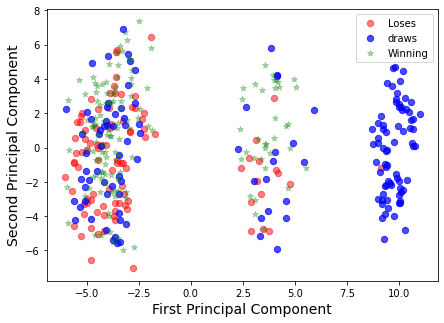

In [68]:
Xax=pca_premise_tw[:,0]
Yax=pca_premise_tw[:,1]
#labels=cancer.target
cdict={-1:'red',1:'green', 0:'blue'}
labl={1:'Winning',-1:'Loses', 0:'draws'}
marker={1:'*',-1:'o', 0:'o'}
alpha={1:.3, -1:.5, 0:.7}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(label):
    ix = np.where(label==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()
# please check the scatter plot of the remaining component and you will understand the difference

/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


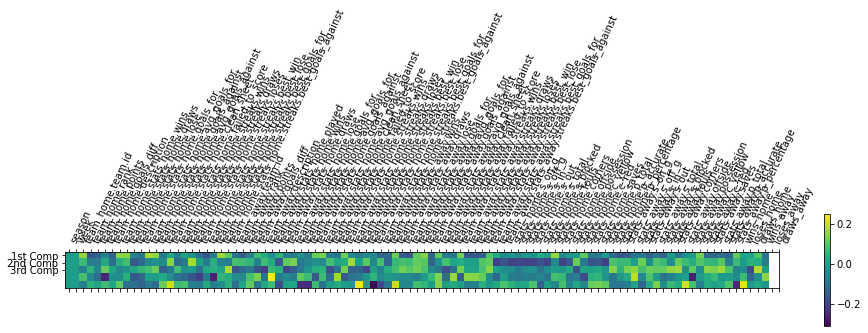

In [69]:
feature_names = df_premise.columns
plt.matshow(pca_tw.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_names)),feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [142]:
# SVM algorithm, using premise
from sklearn.svm import SVC
sv_p = SVC(gamma='auto', probability=True)
sv_p.fit(pca_premise, label)
results_premise["svm"] = sv_p.predict(pca_test_premise)
results_premise.head()

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm
6,2020,10,2288,18,8,-8,0,2,1,2,...,222.714286,181.714286,0.464286,1,3,1,2,1,2,-1
141,2020,10,2298,12,10,-2,2,1,2,1,...,197.625000,156.125000,0.392500,1,2,2,1,4,0,-1
118,2020,10,2283,15,9,-3,0,2,0,2,...,173.000000,147.000000,0.320000,2,1,2,1,2,2,1
123,2020,10,2279,10,11,1,2,1,2,1,...,183.625000,133.750000,0.452500,0,2,3,1,2,2,0
37,2020,10,2287,3,19,6,1,3,0,1,...,232.500000,188.875000,0.505000,3,2,0,2,3,0,1


In [143]:
print(results_premise["svm"])

6     -1
141   -1
118    1
123    0
37     1
10     1
129    1
26     1
68     0
Name: svm, dtype: int64


In [144]:
# SVM, Not using premise
sv = SVC(gamma='auto')
sv.fit(pca_laliga, label)
results_laliga["svm"] = sv.predict(pca_test_laliga)
results_laliga.head()

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm
6,2020,10,2288,18,8,-8,0,2,1,2,...,222.714286,181.714286,0.464286,1,3,1,2,1,2,-1
141,2020,10,2298,12,10,-2,2,1,2,1,...,197.625000,156.125000,0.392500,1,2,2,1,4,0,-1
118,2020,10,2283,15,9,-3,0,2,0,2,...,173.000000,147.000000,0.320000,2,1,2,1,2,2,1
123,2020,10,2279,10,11,1,2,1,2,1,...,183.625000,133.750000,0.452500,0,2,3,1,2,2,0
37,2020,10,2287,3,19,6,1,3,0,1,...,232.500000,188.875000,0.505000,3,2,0,2,3,0,1


In [145]:
print(results_laliga["svm"])

6     -1
141   -1
118    1
123    0
37     1
10     1
129    1
26     1
68     0
Name: svm, dtype: int64


In [146]:
# SVM using premise with PCA
sv_p_fi = SVC(gamma='auto')
sv_p_fi.fit(pca_premise_fi, label)
results_premise["svm_pca_fi"] = sv_p_fi.predict(pca_test_premise_fi)
print(results_premise["svm_pca_fi"])
sv_p_tw = SVC(gamma='auto')
sv_p_tw.fit(pca_premise_tw, label)
results_premise["svm_pca_tw"] = sv_p_tw.predict(pca_test_premise_tw)
print(results_premise["svm_pca_tw"])

6      1
141    1
118    0
123    1
37     1
10     1
129    1
26     1
68     1
Name: svm_pca_fi, dtype: int64
6      1
141    1
118   -1
123    1
37     1
10     1
129    1
26     1
68     1
Name: svm_pca_tw, dtype: int64


In [147]:
# SVM, Not using premise with PCA
sv_fi = SVC(gamma='auto')
sv_fi.fit(pca_laliga_fi, label)
results_laliga["svm_pca_fi"] = sv_fi.predict(pca_test_laliga_fi)
print(results_laliga["svm_pca_fi"])
sv_tw = SVC(gamma='auto')
sv_tw.fit(pca_laliga_tw, label)
results_laliga["svm_pca_tw"] = sv_tw.predict(pca_test_laliga_tw)
print(results_laliga["svm_pca_tw"])

6      1
141    1
118    1
123    1
37     1
10     1
129    1
26     1
68     1
Name: svm_pca_fi, dtype: int64
6      1
141    1
118    1
123    1
37     1
10     1
129    1
26     1
68     1
Name: svm_pca_tw, dtype: int64


In [148]:
df_premise.head()

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2020,4,2288,16,4,-3,0,1,1,1,...,3.0,465.0,389.0,0.84,1,2,1,1,2,2
1,2020,14,2288,18,8,-8,0,2,1,2,...,0.0,0.0,0.0,0.00,1,3,1,2,3,0
2,2020,8,2288,15,8,-7,0,2,1,2,...,5.0,583.0,525.0,0.90,2,2,1,3,0,2
3,2020,16,2288,18,8,-8,0,2,1,2,...,0.0,0.0,0.0,0.00,1,3,1,2,3,0
4,2020,3,2288,18,1,-4,0,0,1,1,...,2.0,264.0,197.0,0.75,0,2,1,3,2,0


In [149]:
# Naive Bayes, using premise
from sklearn.naive_bayes import GaussianNB
gnb_p = GaussianNB()
gnb_p.fit(df_premise, label)
results_premise["nb"] = gnb_p.predict(ts_premise)

In [150]:
# Regular NB
gnb = GaussianNB()
gnb_p.fit(df_laliga, label)
results_laliga["nb"] = gnb_p.predict(ts_laliga)
results_laliga.head()

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb
6,2020,10,2288,18,8,-8,0,2,1,2,...,1,3,1,2,1,2,-1,1,1,0
141,2020,10,2298,12,10,-2,2,1,2,1,...,1,2,2,1,4,0,-1,1,1,0
118,2020,10,2283,15,9,-3,0,2,0,2,...,2,1,2,1,2,2,1,1,1,0
123,2020,10,2279,10,11,1,2,1,2,1,...,0,2,3,1,2,2,0,1,1,0
37,2020,10,2287,3,19,6,1,3,0,1,...,3,2,0,2,3,0,1,1,1,0


In [79]:
# Add ids # NO EN PCA
pca_laliga_fi['team_home.team.id'] = df_laliga['team_home.team.id'].values
pca_laliga_fi['team_away.team.id'] = df_laliga['team_away.team.id'].values
pca_premise_fi['team_home.team.id'] = df_laliga['team_home.team.id'].values
pca_premise_fi['team_away.team.id'] = df_laliga['team_away.team.id'].values
pca_test_laliga_fi['team_home.team.id'] = ts_laliga['team_home.team.id'].values
pca_test_laliga_fi['team_away.team.id'] = ts_laliga['team_away.team.id'].values
pca_test_premise_fi['team_home.team.id'] = ts_laliga['team_home.team.id'].values
pca_test_premise_fi['team_away.team.id'] = ts_laliga['team_away.team.id'].values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [151]:
# NB using premise with PCA
gnb_p_fi = GaussianNB()
gnb_p_fi.fit(pca_premise_fi, label)
results_premise["nb_pca_fi"] = gnb_p_fi.predict(pca_test_premise_fi)
gnb_p_tw = GaussianNB()
gnb_p_tw.fit(pca_premise_tw, label)
results_premise["nb_pca_tw"] = gnb_p_tw.predict(pca_test_premise_tw)
results_premise.head(10)

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw
6,2020,10,2288,18,8,-8,0,2,1,2,...,1,2,1,2,-1,1,1,0,-1,0
141,2020,10,2298,12,10,-2,2,1,2,1,...,2,1,4,0,-1,1,1,0,1,1
118,2020,10,2283,15,9,-3,0,2,0,2,...,2,1,2,2,1,0,-1,0,-1,-1
123,2020,10,2279,10,11,1,2,1,2,1,...,3,1,2,2,0,1,1,0,1,1
37,2020,10,2287,3,19,6,1,3,0,1,...,0,2,3,0,1,1,1,0,1,1
10,2020,10,2286,1,19,9,1,3,2,0,...,2,1,4,0,1,1,1,0,1,1
129,2020,10,2290,9,11,3,2,3,1,0,...,1,3,0,2,1,1,1,0,0,0
26,2020,10,2280,13,10,-7,0,3,1,1,...,0,4,1,0,1,1,1,0,0,0
68,2020,10,2292,5,14,2,2,3,0,2,...,1,2,1,2,0,1,1,0,-1,-1


In [152]:
# NB, Not using premise with PCA
gnb_fi = GaussianNB()
gnb_fi.fit(pca_laliga_fi, label)
results_laliga["nb_pca_fi"] = gnb_fi.predict(pca_test_laliga_fi)
gnb_tw = GaussianNB()
gnb_tw.fit(pca_laliga_tw, label)
results_laliga["nb_pca_tw"] = gnb_tw.predict(pca_test_laliga_tw)
results_laliga.head()

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw
6,2020,10,2288,18,8,-8,0,2,1,2,...,1,2,1,2,-1,1,1,0,0,0
141,2020,10,2298,12,10,-2,2,1,2,1,...,2,1,4,0,-1,1,1,0,1,1
118,2020,10,2283,15,9,-3,0,2,0,2,...,2,1,2,2,1,1,1,0,1,1
123,2020,10,2279,10,11,1,2,1,2,1,...,3,1,2,2,0,1,1,0,1,1
37,2020,10,2287,3,19,6,1,3,0,1,...,0,2,3,0,1,1,1,0,1,1


In [153]:
"""
    Feature Selection:
    Test against ANOVA f-score
"""

'\n    Feature Selection:\n    Test against ANOVA f-score\n'

In [154]:
from sklearn.feature_selection import SelectKBest, f_classif

In [155]:
# Using ANOVA f-score
best_features_premise = SelectKBest(f_classif, k=20).fit(df_premise, label)
best_features = SelectKBest(f_classif, k=20).fit(df_laliga, label)
df_chi = best_features.transform(df_laliga)
premise_chi = best_features_premise.transform(df_premise)
ts_chi = best_features.transform(ts_laliga)
ts_premise_chi = best_features_premise.transform(ts_premise)

In [156]:
# Using Gaussian Naive Bayes and chi-squared
gnb_p_chi = GaussianNB()
gnb_p_chi.fit(premise_chi, label)
results_premise["nb_fval"] = gnb_p_chi.predict(ts_premise_chi)
gnb_chi = GaussianNB()
gnb_chi.fit(df_chi, label)
results_laliga["nb_fval"] = gnb_chi.predict(ts_chi)
results_premise.head(10)

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,nb_fval
6,2020,10,2288,18,8,-8,0,2,1,2,...,2,1,2,-1,1,1,0,-1,0,0
141,2020,10,2298,12,10,-2,2,1,2,1,...,1,4,0,-1,1,1,0,1,1,0
118,2020,10,2283,15,9,-3,0,2,0,2,...,1,2,2,1,0,-1,0,-1,-1,0
123,2020,10,2279,10,11,1,2,1,2,1,...,1,2,2,0,1,1,0,1,1,0
37,2020,10,2287,3,19,6,1,3,0,1,...,2,3,0,1,1,1,0,1,1,0
10,2020,10,2286,1,19,9,1,3,2,0,...,1,4,0,1,1,1,0,1,1,0
129,2020,10,2290,9,11,3,2,3,1,0,...,3,0,2,1,1,1,0,0,0,0
26,2020,10,2280,13,10,-7,0,3,1,1,...,4,1,0,1,1,1,0,0,0,0
68,2020,10,2292,5,14,2,2,3,0,2,...,2,1,2,0,1,1,0,-1,-1,0


In [157]:
# Using Random Forests for Training with all Features
from sklearn.ensemble import RandomForestClassifier
# At least two matches en each classification per week
premise_clf = RandomForestClassifier(criterion="entropy", max_features="log2", min_samples_leaf=2).fit(df_premise, label)
results_premise["rf"] = premise_clf.predict(ts_premise)
laliga_clf = RandomForestClassifier(criterion="entropy", max_features="log2", min_samples_leaf=2).fit(df_laliga, label)
results_laliga["rf"] = laliga_clf.predict(ts_laliga)

In [158]:
df_premise.head()

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2020,4,2288,16,4,-3,0,1,1,1,...,3.0,465.0,389.0,0.84,1,2,1,1,2,2
1,2020,14,2288,18,8,-8,0,2,1,2,...,0.0,0.0,0.0,0.00,1,3,1,2,3,0
2,2020,8,2288,15,8,-7,0,2,1,2,...,5.0,583.0,525.0,0.90,2,2,1,3,0,2
3,2020,16,2288,18,8,-8,0,2,1,2,...,0.0,0.0,0.0,0.00,1,3,1,2,3,0
4,2020,3,2288,18,1,-4,0,0,1,1,...,2.0,264.0,197.0,0.75,0,2,1,3,2,0


In [159]:
importances = premise_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in premise_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

columns_name = df_laliga.columns

for f in range(df_laliga.shape[1]):
    print("%d. feature %s %d (%f)" % (f + 1, columns_name[indices[f]], indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df_laliga.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(df_laliga.shape[1]), indices)
plt.xlim([-1, df_laliga.shape[1]])
plt.show()

Feature ranking:
1. feature team_away.stats_away.streaks.best_goals_against 75 (0.031426)
2. feature team_away.stats_away.failed_to_score 68 (0.030780)
3. feature team_away.stats_away.goals_against 65 (0.030673)
4. feature stats_home.s_on_g 76 (0.027982)
5. feature team_away.stats_away.streaks.draws 70 (0.026632)
6. feature team_away.stats_away.draws 61 (0.026326)
7. feature stats_home.s_off_g 77 (0.025246)
8. feature stats_away.s_on_g 92 (0.024895)
9. feature team_away.stats_away.goals_for 63 (0.022499)
10. feature stats_home.corners 83 (0.022223)
11. feature team_away.stats_away.avg_goals_against 66 (0.021142)
12. feature team_away.stats_away.streaks.best_goals_for 74 (0.019865)
13. feature stats_home.p_accurate 90 (0.019571)
14. feature stats_home.p_percentage 91 (0.019181)
15. feature team_home.stats_home.lose 9 (0.019043)
16. feature stats_home.fouls 82 (0.018448)
17. feature stats_home.s_out 79 (0.017764)
18. feature team_away.stats_away.lose 62 (0.015967)
19. feature stats_home.

IndexError: index 99 is out of bounds for axis 0 with size 99

In [160]:
print(premise_clf.predict_proba(ts_premise)[5])
print(premise_clf.predict_proba(ts_premise)[8])

[0.133      0.36166667 0.50533333]
[0.244      0.46166667 0.29433333]


In [161]:
ts_premise.head(10)

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
6,2020,10,2288,18,8,-8,0,2,1,2,...,2.000,222.714286,181.714286,0.464286,1,3,1,2,1,2
141,2020,10,2298,12,10,-2,2,1,2,1,...,2.000,197.625000,156.125000,0.392500,1,2,2,1,4,0
118,2020,10,2283,15,9,-3,0,2,0,2,...,1.000,173.000000,147.000000,0.320000,2,1,2,1,2,2
123,2020,10,2279,10,11,1,2,1,2,1,...,2.250,183.625000,133.750000,0.452500,0,2,3,1,2,2
37,2020,10,2287,3,19,6,1,3,0,1,...,1.250,232.500000,188.875000,0.505000,3,2,0,2,3,0
10,2020,10,2286,1,19,9,1,3,2,0,...,2.500,200.333333,158.500000,0.520000,3,0,2,1,4,0
129,2020,10,2290,9,11,3,2,3,1,0,...,2.250,335.125000,290.875000,0.541250,2,2,1,3,0,2
26,2020,10,2280,13,10,-7,0,3,1,1,...,1.125,225.125000,190.250000,0.418750,2,3,0,4,1,0
68,2020,10,2292,5,14,2,2,3,0,2,...,1.500,162.375000,123.875000,0.380000,3,1,1,2,1,2


In [162]:
ts_premise.head()

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
6,2020,10,2288,18,8,-8,0,2,1,2,...,2.00,222.714286,181.714286,0.464286,1,3,1,2,1,2
141,2020,10,2298,12,10,-2,2,1,2,1,...,2.00,197.625000,156.125000,0.392500,1,2,2,1,4,0
118,2020,10,2283,15,9,-3,0,2,0,2,...,1.00,173.000000,147.000000,0.320000,2,1,2,1,2,2
123,2020,10,2279,10,11,1,2,1,2,1,...,2.25,183.625000,133.750000,0.452500,0,2,3,1,2,2
37,2020,10,2287,3,19,6,1,3,0,1,...,1.25,232.500000,188.875000,0.505000,3,2,0,2,3,0


In [163]:
def prob(x, result):
    count = 0
    result = float(result)
    if x["nb"] == result:
        count = count + 1
    if x["nb_pca_fi"] == result:
        count = count + 1
    if x["nb_pca_tw"] == result:
        count = count + 1
    if x["nb_fval"] == result:
        count = count + 1
    if x["rf"] == result:
        count = count + 1
    return count/5

In [164]:
# Probability
win_result = '1'
lose_result = '-1'
draw_result = '0'
results_laliga["w_p"] = results_laliga.apply(prob, args=(win_result), axis=1)
results_laliga["d_p"] = results_laliga.apply(prob, args=(draw_result), axis=1)
results_laliga["l_p"] = 1 - (results_laliga["w_p"] + results_laliga["d_p"])
results_laliga.head()

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,nb_fval,rf,w_p,d_p,l_p
6,2020,10,2288,18,8,-8,0,2,1,2,...,1,1,0,0,0,0,-1,0.0,0.8,0.2
141,2020,10,2298,12,10,-2,2,1,2,1,...,1,1,0,1,1,0,1,0.6,0.4,0.0
118,2020,10,2283,15,9,-3,0,2,0,2,...,1,1,0,1,1,0,1,0.6,0.4,0.0
123,2020,10,2279,10,11,1,2,1,2,1,...,1,1,0,1,1,0,0,0.4,0.6,0.0
37,2020,10,2287,3,19,6,1,3,0,1,...,1,1,0,1,1,0,1,0.6,0.4,0.0


In [165]:
results_premise["w_p"] = results_premise.apply(prob, args=(win_result), axis=1)
results_premise["d_p"] = results_premise.apply(prob, args=(draw_result), axis=1)
results_premise["l_p"] = 1 - (results_premise["w_p"] + results_premise["d_p"])
results_premise.head(10)

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,nb_fval,rf,w_p,d_p,l_p
6,2020,10,2288,18,8,-8,0,2,1,2,...,1,1,0,-1,0,0,-1,0.0,0.6,0.4
141,2020,10,2298,12,10,-2,2,1,2,1,...,1,1,0,1,1,0,0,0.4,0.6,0.0
118,2020,10,2283,15,9,-3,0,2,0,2,...,0,-1,0,-1,-1,0,0,0.0,0.6,0.4
123,2020,10,2279,10,11,1,2,1,2,1,...,1,1,0,1,1,0,0,0.4,0.6,0.0
37,2020,10,2287,3,19,6,1,3,0,1,...,1,1,0,1,1,0,1,0.6,0.4,0.0
10,2020,10,2286,1,19,9,1,3,2,0,...,1,1,0,1,1,0,1,0.6,0.4,0.0
129,2020,10,2290,9,11,3,2,3,1,0,...,1,1,0,0,0,0,0,0.0,1.0,0.0
26,2020,10,2280,13,10,-7,0,3,1,1,...,1,1,0,0,0,0,1,0.2,0.8,0.0
68,2020,10,2292,5,14,2,2,3,0,2,...,1,1,0,-1,-1,0,0,0.0,0.6,0.4


In [166]:
# Adding name columns
results_laliga["team_home.team.name"] = ts_name["team_home.team.name"]
results_laliga["team_away.team.name"] = ts_name["team_away.team.name"]
results_premise["team_home.team.name"] = ts_name["team_home.team.name"]
results_premise["team_away.team.name"] = ts_name["team_away.team.name"]

In [167]:
# csv to save
file_title = 'ligamx_p10.csv'
results_file = dirCountry + file_title
file_title = 'premise_p10.csv'
results_premise_file = dirCountry + file_title

In [97]:
results_laliga.to_csv(results_file)
results_premise.to_csv(results_premise_file)

In [203]:
# Bayesian Gaussian Mixture Clustering using premise with PCA
from sklearn.mixture import BayesianGaussianMixture 
"""
bc_p_fi = BayesianGaussianMixture(n_components = 3, covariance_type ='full')
bc_p_fi.fit(pca_premise_fi, label)
results_premise["bc_pca_fi_full"] = bc_p_fi.predict(pca_test_premise_fi) - 1
bc_p_fi_s = BayesianGaussianMixture(n_components = 3, covariance_type ='spherical')
bc_p_fi_s.fit(pca_premise_fi, label)
results_premise["bc_pca_fi_sph"] = bc_p_fi_s.predict(pca_test_premise_fi) - 1
bc_p_tw = BayesianGaussianMixture(n_components = 3, covariance_type ='full')
bc_p_tw.fit(pca_premise_tw, label)
results_premise["bc_pca_tw_full"] = bc_p_tw.predict(pca_test_premise_tw) - 1
bc_p_tw_s = BayesianGaussianMixture(n_components = 3, covariance_type ='spherical')
bc_p_tw_s.fit(pca_premise_tw, label)
results_premise["bc_pca_tw_sph"] = bc_p_tw_s.predict(pca_test_premise_tw) - 1
results_premise.head()
"""

'\nbc_p_fi = BayesianGaussianMixture(n_components = 3, covariance_type =\'full\')\nbc_p_fi.fit(pca_premise_fi, label)\nresults_premise["bc_pca_fi_full"] = bc_p_fi.predict(pca_test_premise_fi) - 1\nbc_p_fi_s = BayesianGaussianMixture(n_components = 3, covariance_type =\'spherical\')\nbc_p_fi_s.fit(pca_premise_fi, label)\nresults_premise["bc_pca_fi_sph"] = bc_p_fi_s.predict(pca_test_premise_fi) - 1\nbc_p_tw = BayesianGaussianMixture(n_components = 3, covariance_type =\'full\')\nbc_p_tw.fit(pca_premise_tw, label)\nresults_premise["bc_pca_tw_full"] = bc_p_tw.predict(pca_test_premise_tw) - 1\nbc_p_tw_s = BayesianGaussianMixture(n_components = 3, covariance_type =\'spherical\')\nbc_p_tw_s.fit(pca_premise_tw, label)\nresults_premise["bc_pca_tw_sph"] = bc_p_tw_s.predict(pca_test_premise_tw) - 1\nresults_premise.head()\n'

In [204]:
# Testing Gaussian Clustering

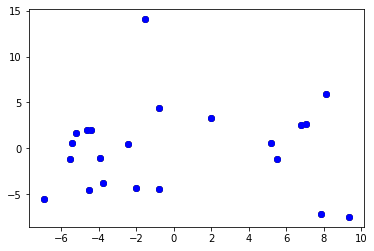

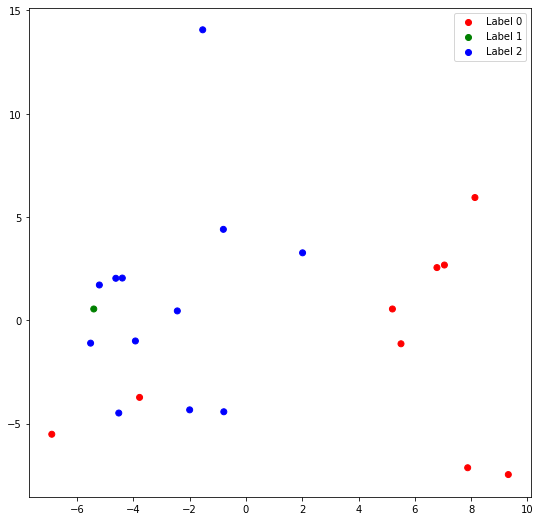

In [308]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["nb_pca_tw"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show() 

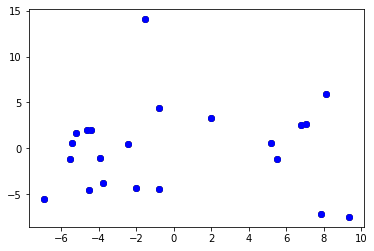

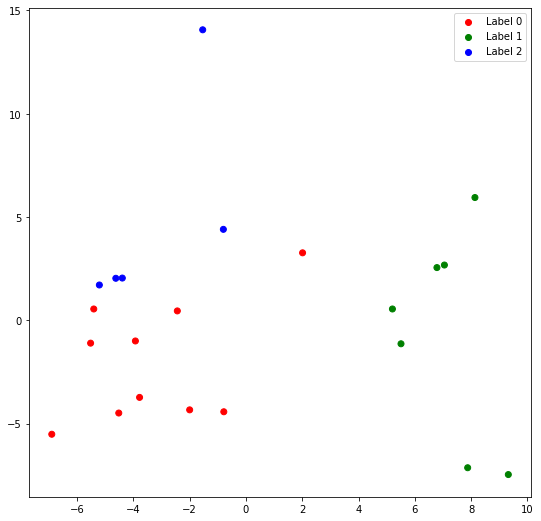

In [309]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["bc_pca_tw_sph"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show()

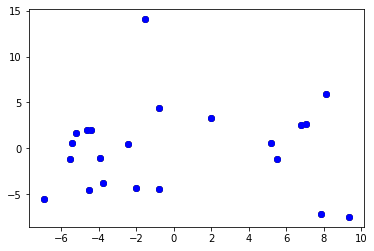

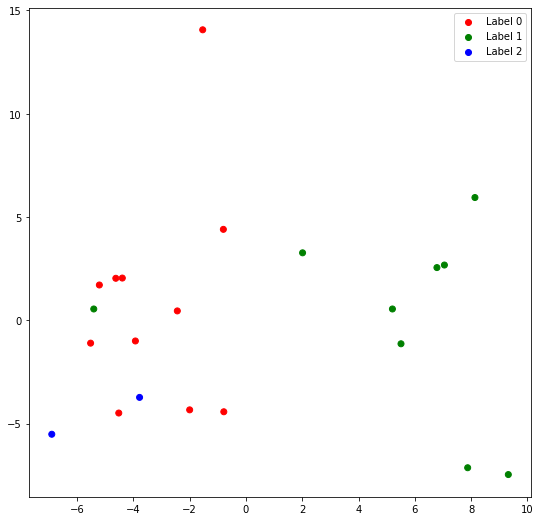

In [310]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["bc_pca_tw_full"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show() 